# Modelling - anxiety

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn import svm
from sklearn.preprocessing import label_binarize
from itertools import cycle


In [2]:
depression_data = pd.read_csv("depression_data.csv")

### I will do the first model for depression, without balancing. To see how it is.


#### X/y split

In [3]:
X_depression = depression_data.drop("severeness_level_depression", axis = 1)
y_depression = depression_data["severeness_level_depression"]

In [4]:
X_train_dep, X_test_dep, y_train_dep, y_test_dep = train_test_split(X_depression, y_depression, test_size = 0.20, random_state = 123)

In [5]:
# Standardizing the dataframe.

std_scaler = StandardScaler().fit(X_train_dep)
X_depression_train_scaled = std_scaler.transform(X_train_dep)
X_depression_test_scaled = std_scaler.transform(X_test_dep)

#### Logistic regression

,Error_metric,Train,Test
0,Accuracy,0.998522,0.998365
1,Precision,0.998584,0.998790
2,Recall,0.997046,0.996577


Confusion matrix for the train set
[[ 4834     0     0]
 [   13  5256    34]
 [    0     0 21670]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


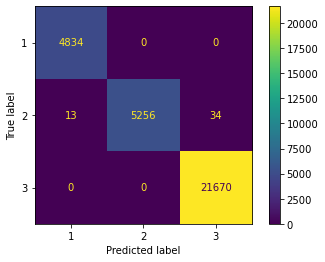



Confusion matrix for the test set
[[1236    0    0]
 [   2 1253   11]
 [   0    0 5450]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


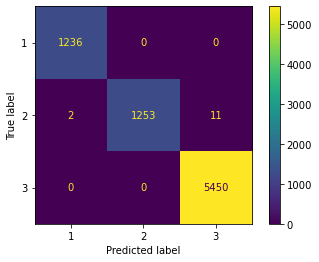

In [6]:
log_model = LogisticRegression(multi_class='ovr') 
log_model.fit(X_depression_train_scaled, y_train_dep)
y_pred_train_log_dep = log_model.predict(X_depression_train_scaled)
y_pred_test_log_dep = log_model.predict(X_depression_test_scaled)

performance_log_dep = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_dep, y_pred_train_log_dep),
                                         precision_score(y_train_dep, y_pred_train_log_dep, average = "macro"),
                                         recall_score(y_train_dep, y_pred_train_log_dep, average = "macro")],
                               'Test': [accuracy_score(y_test_dep, y_pred_test_log_dep),
                                        precision_score(y_test_dep, y_pred_test_log_dep, average = "macro"),
                                        recall_score(y_test_dep, y_pred_test_log_dep, average = "macro")]})

display(performance_log_dep)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train_dep,y_pred_train_log_dep))
plot_confusion_matrix(log_model,X_depression_train_scaled,y_train_dep, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test_dep, y_pred_test_log_dep))
plot_confusion_matrix(log_model,X_depression_test_scaled,y_test_dep, values_format = 'd')
plt.show()

#### KNN

,Error_metric,Train,Test
0,Accuracy,0.945735,0.915241
1,Precision,0.907806,0.852102
2,Recall,0.908081,0.856909


Confusion matrix for the train set
[[ 4679   155     0]
 [  791  4101   411]
 [    7   362 21301]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


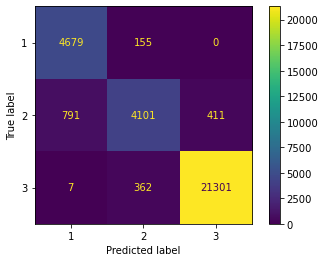



Confusion matrix for the test set
[[1174   62    0]
 [ 283  826  157]
 [   1  171 5278]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


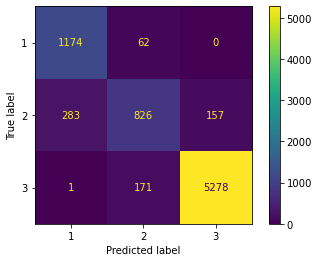

In [7]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_depression_train_scaled, y_train_dep)
y_pred_train_log_dep = knn_model.predict(X_depression_train_scaled)
y_pred_test_log_dep = knn_model.predict(X_depression_test_scaled)

performance_log_dep = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_dep, y_pred_train_log_dep),
                                         precision_score(y_train_dep, y_pred_train_log_dep, average = "macro"),
                                         recall_score(y_train_dep, y_pred_train_log_dep, average = "macro")],
                               'Test': [accuracy_score(y_test_dep, y_pred_test_log_dep),
                                        precision_score(y_test_dep, y_pred_test_log_dep, average = "macro"),
                                        recall_score(y_test_dep, y_pred_test_log_dep, average = "macro")]})

display(performance_log_dep)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train_dep,y_pred_train_log_dep))
plot_confusion_matrix(knn_model,X_depression_train_scaled,y_train_dep, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test_dep, y_pred_test_log_dep))
plot_confusion_matrix(knn_model,X_depression_test_scaled,y_test_dep, values_format = 'd')
plt.show()

#### Decision tree

,Error_metric,Train,Test
0,Accuracy,0.850567,0.847711
1,Precision,0.779224,0.770413
2,Recall,0.745595,0.740907


Confusion matrix for the train set
[[ 3334   526    44]
 [ 1421  3177  1083]
 [   79  1600 20543]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


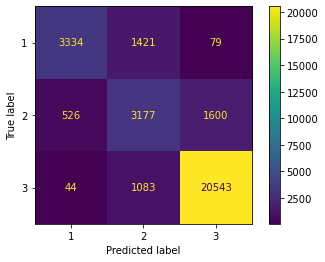



Confusion matrix for the test set
[[ 845  133   13]
 [ 373  754  295]
 [  18  379 5142]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


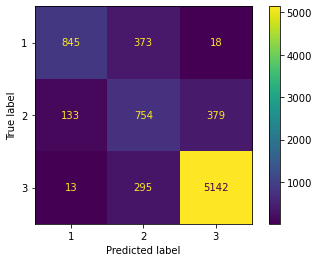

In [8]:
dt = DecisionTreeClassifier(max_depth=4)

dt.fit(X_train_dep, y_train_dep)

y_pred_train_dt_dep = dt.predict(X_train_dep)
y_pred_test_dt_dep = dt.predict(X_test_dep)


performance_df_dep = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_dep, y_pred_train_dt_dep),
                                         precision_score(y_train_dep, y_pred_train_dt_dep, average = "macro"),
                                         recall_score(y_train_dep, y_pred_train_dt_dep, average = "macro")],
                               'Test': [accuracy_score(y_test_dep, y_pred_test_dt_dep),
                                        precision_score(y_test_dep, y_pred_test_dt_dep, average = "macro"),
                                        recall_score(y_test_dep, y_pred_test_dt_dep, average = "macro")]})

display(performance_df_dep)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train_dep,y_pred_train_dt_dep).T)
plot_confusion_matrix(dt,X_train_dep,y_train_dep, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test_dep,y_pred_test_dt_dep).T)
plot_confusion_matrix(dt,X_test_dep,y_test_dep, values_format = 'd')
plt.show()

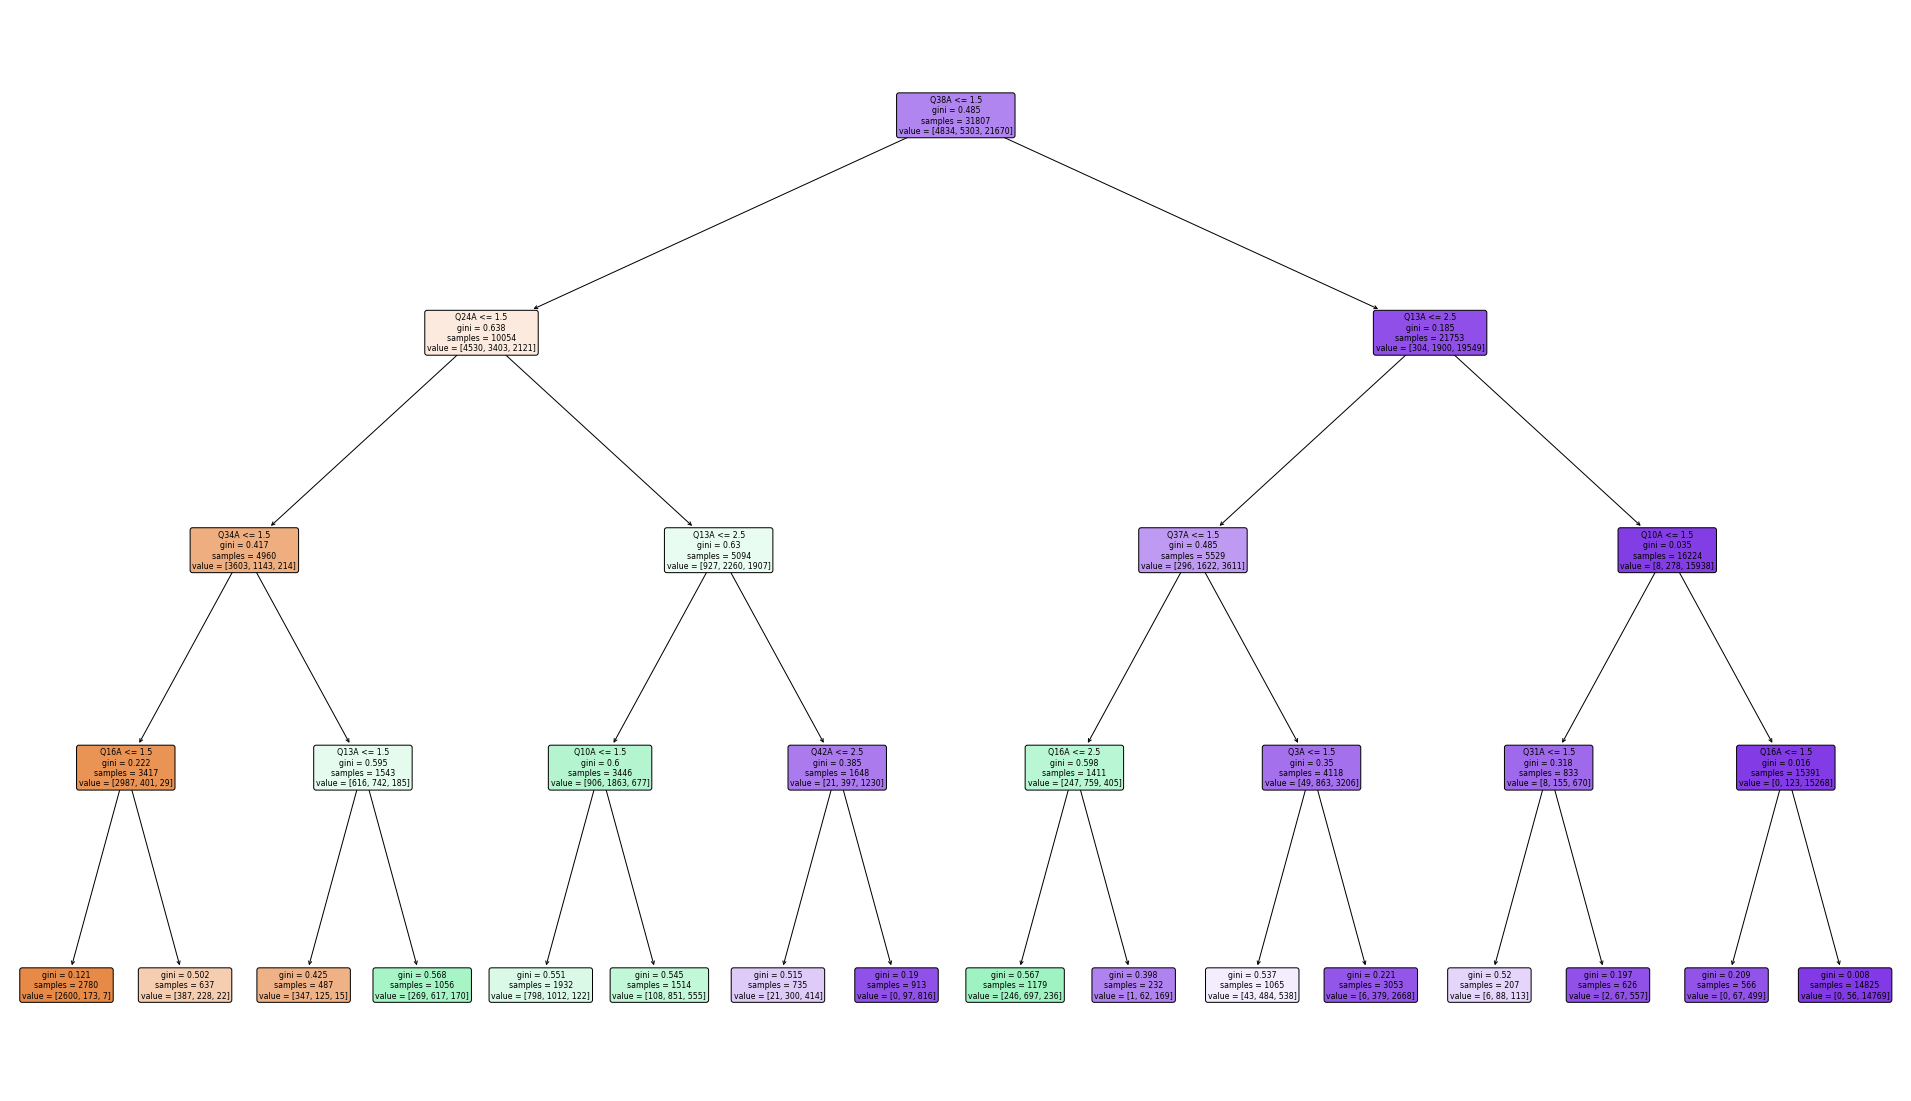

In [9]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(dt,filled = True, rounded=True,feature_names=X_depression.columns)
plt.show()

#### Random forest

In [10]:
# Applying the random forest.
# max_features="sqrt" - this didn't change the final scores.
# Max_depth - less is better, if I have higher nr the scores are more than 90, maybe too good?
# Nr of estimators - tried with 30, 20, 50, 40 - scores didn't change much (only for 20)

clf = RandomForestClassifier(max_depth=4, n_estimators=30, random_state=0, bootstrap=True, oob_score=True)
clf.fit(X_train_dep, y_train_dep)
print(clf.score(X_train_dep, y_train_dep))
print(clf.score(X_test_dep, y_test_dep))

0.9105228408840821
0.9079476861167002


In [11]:
# Cross validation, accuracy scores.

clf = RandomForestClassifier(max_depth=4, n_estimators=30, random_state=0, bootstrap=True, oob_score=True)
cross_val_scores_dep = cross_val_score(clf, X_train_dep, y_train_dep, cv=5)
cross_val_scores_dep

array([0.90616158, 0.90804778, 0.90646125, 0.90803333, 0.90677566])

In [12]:
np.mean(cross_val_scores_dep)

0.9070959217302901

### Solving the imbalancement for depression

In [13]:
# Checking the imbalance
# Classes: 1 (moderate), 2 (severe), 3 (extremely severe)

y_depression.value_counts()

3    27120
2     6569
1     6070
Name: severeness_level_depression, dtype: int64

In [14]:
# I will downsample class 3 and upsample class 1 to have the same amount of values than class 2.

class_1_dep = depression_data[depression_data["severeness_level_depression"] == 1]
class_2_dep = depression_data[depression_data["severeness_level_depression"] == 2]
class_3_dep = depression_data[depression_data["severeness_level_depression"] == 3]

In [15]:
class_3_dep_down = class_3_dep.sample(len(class_2_dep,))

In [16]:
class_1_dep_up = class_1_dep.sample(len(class_2_dep), replace=True)

In [17]:
depression_data_balanced = pd.concat([class_1_dep_up, class_2_dep, class_3_dep_down], axis=0)

depression_data_balanced = depression_data_balanced.sample(frac=1)
depression_data_balanced["severeness_level_depression"].value_counts() 

1    6569
2    6569
3    6569
Name: severeness_level_depression, dtype: int64

### Modelling with depression data, balanced

In [18]:
X_dep_bal = depression_data_balanced.drop("severeness_level_depression", axis = 1)
y_dep_bal = depression_data_balanced["severeness_level_depression"]

In [19]:
X_train_dep_bal, X_test_dep_bal, y_train_dep_bal, y_test_dep_bal = train_test_split(X_dep_bal, y_dep_bal, test_size = 0.20, random_state = 123)



In [20]:
# Standardizing the dataframe.

std_scaler = StandardScaler().fit(X_train_dep_bal)
X_dep_bal_train_scaled = std_scaler.transform(X_train_dep_bal)
X_dep_bal_test_scaled = std_scaler.transform(X_test_dep_bal)

#### Logistic regression

,Error_metric,Train,Test
0,Accuracy,0.999493,0.998985
1,Precision,0.999491,0.998999
2,Recall,0.999497,0.998948


Confusion matrix for the train set
[[5248    0    0]
 [   4 5293    4]
 [   0    0 5216]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


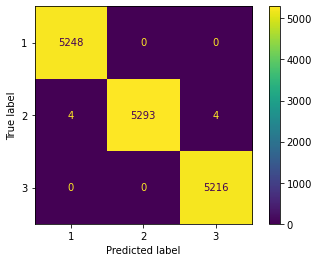



Confusion matrix for the test set
[[1321    0    0]
 [   3 1264    1]
 [   0    0 1353]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


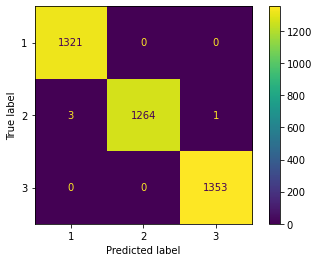

In [21]:
log_model = LogisticRegression(multi_class='ovr') 
log_model.fit(X_dep_bal_train_scaled, y_train_dep_bal)
y_pred_train_log_dep_bal = log_model.predict(X_dep_bal_train_scaled)
y_pred_test_log_dep_bal = log_model.predict(X_dep_bal_test_scaled)

performance_log_dep_bal = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_dep_bal, y_pred_train_log_dep_bal),
                                         precision_score(y_train_dep_bal, y_pred_train_log_dep_bal, average = "macro"),
                                         recall_score(y_train_dep_bal, y_pred_train_log_dep_bal, average = "macro")],
                               'Test': [accuracy_score(y_test_dep_bal, y_pred_test_log_dep_bal),
                                        precision_score(y_test_dep_bal, y_pred_test_log_dep_bal, average = "macro"),
                                        recall_score(y_test_dep_bal, y_pred_test_log_dep_bal, average = "macro")]})

display(performance_log_dep_bal)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train_dep_bal,y_pred_train_log_dep_bal))
plot_confusion_matrix(log_model,X_dep_bal_train_scaled,y_train_dep_bal, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test_dep_bal, y_pred_test_log_dep_bal))
plot_confusion_matrix(log_model,X_dep_bal_test_scaled,y_test_dep_bal, values_format = 'd')
plt.show()

#### KNN

,Error_metric,Train,Test
0,Accuracy,0.888931,0.856672
1,Precision,0.896559,0.866138
2,Recall,0.889235,0.854812


Confusion matrix for the train set
[[5200   48    0]
 [1071 4212   18]
 [   4  610 4602]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


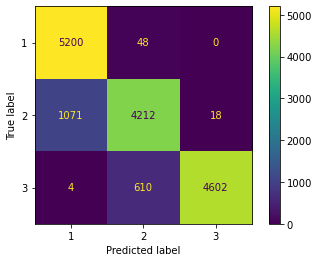



Confusion matrix for the test set
[[1305   16    0]
 [ 354  911    3]
 [   1  191 1161]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


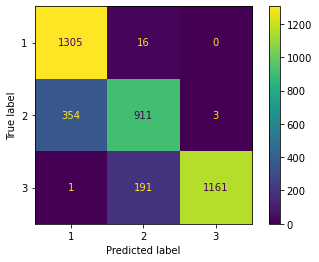

In [22]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_dep_bal_train_scaled, y_train_dep_bal)
y_pred_train_log_dep_bal = knn_model.predict(X_dep_bal_train_scaled)
y_pred_test_log_dep_bal = knn_model.predict(X_dep_bal_test_scaled)

performance_log_dep_bal = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_dep_bal, y_pred_train_log_dep_bal),
                                         precision_score(y_train_dep_bal, y_pred_train_log_dep_bal, average = "macro"),
                                         recall_score(y_train_dep_bal, y_pred_train_log_dep_bal, average = "macro")],
                               'Test': [accuracy_score(y_test_dep_bal, y_pred_test_log_dep_bal),
                                        precision_score(y_test_dep_bal, y_pred_test_log_dep_bal, average = "macro"),
                                        recall_score(y_test_dep_bal, y_pred_test_log_dep_bal, average = "macro")]})

display(performance_log_dep_bal)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train_dep_bal,y_pred_train_log_dep_bal))
plot_confusion_matrix(knn_model,X_dep_bal_train_scaled,y_train_dep_bal, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test_dep_bal, y_pred_test_log_dep_bal))
plot_confusion_matrix(knn_model,X_dep_bal_test_scaled,y_test_dep_bal, values_format = 'd')
plt.show()

#### Decision tree

,Error_metric,Train,Test
0,Accuracy,0.823470,0.810756
1,Precision,0.829264,0.814131
2,Recall,0.823699,0.809567


Confusion matrix for the train set
[[4228  690   12]
 [1013 4177  627]
 [   7  434 4577]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


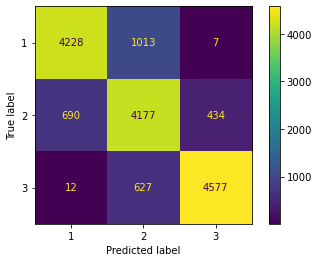



Confusion matrix for the test set
[[1049  191    4]
 [ 266  964  166]
 [   6  113 1183]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


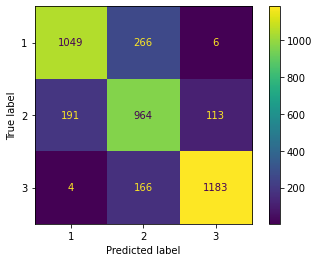

In [23]:
dt = DecisionTreeClassifier(max_depth=5)

dt.fit(X_train_dep_bal, y_train_dep_bal)

y_pred_train_dt_dep_bal = dt.predict(X_train_dep_bal)
y_pred_test_dt_dep_bal = dt.predict(X_test_dep_bal)


performance_df_dep_bal = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_dep_bal, y_pred_train_dt_dep_bal),
                                         precision_score(y_train_dep_bal, y_pred_train_dt_dep_bal, average = "macro"),
                                         recall_score(y_train_dep_bal, y_pred_train_dt_dep_bal, average = "macro")],
                               'Test': [accuracy_score(y_test_dep_bal, y_pred_test_dt_dep_bal),
                                        precision_score(y_test_dep_bal, y_pred_test_dt_dep_bal, average = "macro"),
                                        recall_score(y_test_dep_bal, y_pred_test_dt_dep_bal, average = "macro")]})

display(performance_df_dep_bal)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train_dep_bal,y_pred_train_dt_dep_bal).T)
plot_confusion_matrix(dt,X_train_dep_bal,y_train_dep_bal, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test_dep_bal,y_pred_test_dt_dep_bal).T)
plot_confusion_matrix(dt,X_test_dep_bal,y_test_dep_bal, values_format = 'd')
plt.show()

#### Random forest

In [24]:
clf = RandomForestClassifier(max_depth=4, n_estimators=25, random_state=0, bootstrap=True, oob_score=True)
clf.fit(X_train_dep_bal, y_train_dep_bal)
print(clf.score(X_train_dep_bal, y_train_dep_bal))
print(clf.score(X_test_dep_bal, y_test_dep_bal))

0.8976213130352045
0.8909183155758498


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


In [25]:
y_pred_dep = clf.predict(X_test_dep_bal)
y_pred_dep

array([2, 3, 1, ..., 2, 2, 3])

In [26]:
# Getting the precision and recall scores

print(classification_report(y_test_dep_bal,y_pred_dep))
print(accuracy_score(y_test_dep_bal, y_pred_dep))

              precision    recall  f1-score   support

           1       0.91      0.90      0.90      1321
           2       0.79      0.90      0.84      1268
           3       0.99      0.88      0.93      1353

    accuracy                           0.89      3942
   macro avg       0.90      0.89      0.89      3942
weighted avg       0.90      0.89      0.89      3942

0.8909183155758498


In [27]:
# Using cross validation. Receiving accuracy scores.

clf = RandomForestClassifier(max_depth=4, n_estimators=25, random_state=0, bootstrap=True, oob_score=True)
cross_val_scores_dep_bal = cross_val_score(clf, X_train_dep_bal, y_train_dep_bal, cv=5)
cross_val_scores_dep_bal

/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/miumiu/opt/anaconda3/envs

array([0.88518871, 0.90072946, 0.8791627 , 0.88994608, 0.89375198])

In [28]:
np.mean(cross_val_scores_dep_bal)

0.8897557881382809

#### Hyperparameters and grid search

In [29]:
# Setting parameter values for finding out which gives the best model.

param_grid_dep = {
    "n_estimators": [15, 20, 30],
    "min_samples_split": [2, 4],
    "min_samples_leaf" : [1, 2],
    "max_features": ["sqrt"],
    "max_depth": [8],
    }
clf = RandomForestClassifier(random_state=100)

In [30]:
# Setting the grid search.

grid_search_depression = GridSearchCV(clf, param_grid_dep, cv=5, return_train_score=True, n_jobs=-1,)

In [31]:
# Applying it.

grid_search_depression.fit(X_train_dep_bal,y_train_dep_bal)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [8], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [15, 20, 30]},
             return_train_score=True)

In [32]:
# Which are the best parameters.

grid_search_depression.best_params_

{'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 30}

In [33]:
pd.DataFrame(grid_search_depression.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.256820,0.006139,0.017497,0.001178,8,sqrt,1,2,15,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",...,0.929718,0.002813,10,0.952981,0.950048,0.952268,0.953140,0.949810,0.951649,0.001437
1,0.357958,0.014180,0.021810,0.002493,8,sqrt,1,2,20,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",...,0.933143,0.003097,5,0.955836,0.952506,0.954012,0.954884,0.951158,0.953679,0.001670
2,0.533706,0.011797,0.029652,0.003073,8,sqrt,1,2,30,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",...,0.936695,0.005275,2,0.957897,0.956391,0.958135,0.956787,0.956232,0.957088,0.000782
3,0.261340,0.008351,0.016596,0.002073,8,sqrt,1,4,15,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",...,0.930162,0.005201,9,0.952109,0.951554,0.951951,0.954250,0.949651,0.951903,0.001466
4,0.359743,0.007564,0.022322,0.001981,8,sqrt,1,4,20,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",...,0.932889,0.003929,6,0.955915,0.952109,0.955201,0.955836,0.952664,0.954345,0.001628
5,0.538657,0.012091,0.030204,0.001519,8,sqrt,1,4,30,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",...,0.937710,0.004846,1,0.959562,0.957580,0.958373,0.958056,0.954171,0.957548,0.001811
6,0.261701,0.004265,0.016333,0.001320,8,sqrt,2,2,15,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",...,0.929147,0.005377,11,0.949017,0.948224,0.951554,0.950048,0.950920,0.949952,0.001214
7,0.350765,0.028465,0.020834,0.001487,8,sqrt,2,2,20,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",...,0.930986,0.004724,7,0.952426,0.949413,0.953457,0.953774,0.954964,0.952807,0.001880
8,0.498836,0.010756,0.027495,0.000634,8,sqrt,2,2,30,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",...,0.936251,0.004358,3,0.957104,0.954884,0.955915,0.956629,0.955281,0.955963,0.000822
9,0.253118,0.008353,0.015666,0.001150,8,sqrt,2,4,15,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",...,0.929147,0.005377,11,0.949017,0.948224,0.951554,0.950048,0.950920,0.949952,0.001214


In [34]:
# Checking the result with cross validation.

clf = RandomForestClassifier(random_state=0, max_depth=8, 
                             min_samples_leaf=1, min_samples_split=4, n_estimators=30, bootstrap=True, oob_score=True)
cross_val_scores_dep = cross_val_score(clf, X_train_dep_bal, y_train_dep_bal, cv=5)
print(np.mean(cross_val_scores_dep))

0.936441484300666


#### Principal Component Analysis

In [69]:
# Setting the nr of components.

pca_dep = PCA(n_components=25)
pca_dep_fit = pca_dep.fit(X_dep_bal_train_scaled)

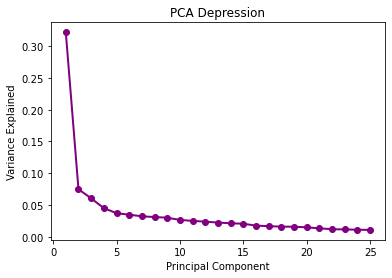

In [70]:
# Plot, where I can see how much each of the seven components contributes.

PC_values_dep = np.arange(pca_dep.n_components_) + 1
plt.plot(PC_values_dep, pca_dep.explained_variance_ratio_, 'o-', linewidth=2, color='purple')
plt.title('PCA Depression')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [37]:
# To get the variance value for each principal component.

print(pca_dep.explained_variance_ratio_)

[0.32175616 0.07493598 0.06061577 0.04520494 0.03731337 0.0348754
 0.03235532]


In [38]:
# Another way

std_scaler = StandardScaler()
X_pca_scaled = std_scaler.fit_transform(X_dep_bal)

In [39]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_scaled, y_dep_bal, test_size = 0.20, random_state = 123)

In [40]:
# Set the variance %.
# Leave 95% of information.
pca_depr = PCA(.95)

In [41]:
# Fit the training set.

X_pca_fitted = pca_depr.fit_transform(X_train_pca)

In [42]:
# How many principal components to get 95% variance?

X_pca_fitted.shape

(15765, 25)

In [43]:
pca_depr.explained_variance_ratio_

array([0.3215872 , 0.07485236, 0.06071591, 0.04531851, 0.03747516,
       0.03482175, 0.03235068, 0.03124085, 0.03027754, 0.02673031,
       0.02504046, 0.02400965, 0.02252384, 0.0214302 , 0.02067819,
       0.01771503, 0.01690556, 0.01609611, 0.01599449, 0.0150979 ,
       0.0134819 , 0.01209285, 0.01178077, 0.01130209, 0.01096888])

In [44]:
# Model

X_train_pca_, X_test_pca_, y_train_pca_, y_test_pca_ = train_test_split(X_pca_fitted, y_train_pca, test_size = 0.20, random_state = 123)

In [45]:
model = RandomForestClassifier(max_depth=8, n_estimators=30, random_state=77, bootstrap=True, oob_score=True)
model.fit(X_train_pca, y_train_pca)
model.score(X_test_pca, y_test_pca)

/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


0.9264332825976661

In [46]:
### Another way

pca = PCA() # create a PCA object
pca.fit(X_train_pca) # do the math
pca_data = pca.transform(X_train_pca) # get PCA coordinates for scaled_data

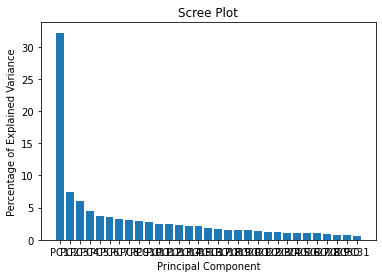

In [47]:
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

#### Feature importance

In [48]:
feature_names_depression = X_train_dep_bal.columns
feature_names_depression = list(feature_names_depression)

In [49]:
clf.fit(X_train_dep_bal, y_train_dep_bal)

RandomForestClassifier(max_depth=8, min_samples_split=4, n_estimators=30,
                       oob_score=True, random_state=0)

In [50]:
depression_feature_df = pd.DataFrame(list(zip(feature_names_depression, clf.feature_importances_)))
depression_feature_df.columns = ['columns_name', 'score_feature_importance']
depression_feature_df.sort_values(by=['score_feature_importance'], ascending = False)

,columns_name,score_feature_importance
3,Q13A,0.136218
2,Q10A,0.105657
6,Q21A,0.104219
10,Q34A,0.097865
7,Q24A,0.083444
5,Q17A,0.073589
4,Q16A,0.064977
8,Q26A,0.062445
0,Q3A,0.044931
1,Q5A,0.044468


#### Model with selected features

In [51]:
final_features_depression = depression_data_balanced[["Q13A", "Q21A", "Q10A", "Q17A", "Q34A", "Q24A", "Q16A", "Q5A", "Q26A", "Q31A", "Q3A", "Q38A", "Q37A", "Q42A", "emotional_stability", "severeness_level_anxiety", "conscientiousness", "extraversion", "age"]]
y_dep_bal = depression_data_balanced["severeness_level_depression"]

In [52]:
X_train_dep_f, X_test_dep_f, y_train_dep_f, y_test_dep_f = train_test_split(final_features_depression, y_dep_bal, test_size = 0.20, random_state = 123)


In [53]:
# I choose random forest as this was the model so far. I will use the parameters from the grid search.

clf = RandomForestClassifier(max_depth=8, n_estimators=30, random_state=0, bootstrap=True, oob_score=True)
cross_val_scores_dep_f = cross_val_score(clf, X_train_dep_f, y_train_dep_f, cv=5)
cross_val_scores_dep_f

array([0.93181097, 0.93625119, 0.93815414, 0.9422772 , 0.93910561])

In [54]:
np.mean(cross_val_scores_dep_f)

0.9375198223913733

#### AUC/ROC curve - for future exploration

In [55]:
# ROC AUC with random forest
#X_train_dep_bal, X_test_dep_bal, y_train_dep_bal, y_test_dep_bal

model_multiclass = RandomForestClassifier(n_estimators = 30, criterion = 'gini')

In [56]:
model_multiclass.fit(X_train_dep_bal, y_train_dep_bal)

RandomForestClassifier(n_estimators=30)

In [57]:
y_pred = model_multiclass.predict(X_test_dep_bal)

In [58]:
y_proba = model_multiclass.predict_proba(X_test_dep_bal)

In [59]:
classes = model_multiclass.classes_
classes

array([1, 2, 3])

In [60]:
def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a treshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [61]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [62]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr

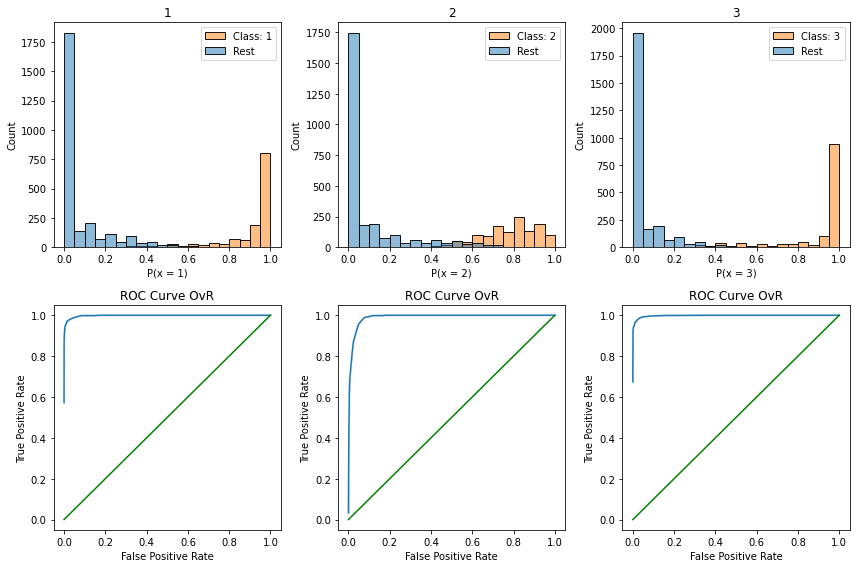

In [63]:
# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test_dep_bal.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test_dep_bal]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
plt.tight_layout()

In [64]:
# Displays the ROC AUC for each class
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"{k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")

1 ROC AUC OvR: 0.9982
2 ROC AUC OvR: 0.9896
3 ROC AUC OvR: 0.9982
average ROC AUC OvR: 0.9953


### Conclusion

In [65]:
# Models perform better after balancing. 
# Logistic regression has too good performance.
# The best model is random forest with cross validation after grid search - 0.929.
# Random forest after selected features is as good - 0.933
# Random forest with PCA ias as good - 0.931
# I could even use smaller parameters for grid search?
# Why logistic regression performs almost perfectly?


# 3 most important features: Q13, Q21, Q10
# Most important personality features: emotional stability, conscientiousness
# Most important demographic: age

# Q13: I felt sad and depressed.
# Q21: I felt that life wasn't worthwhile.
# Q10: I felt that I had nothing to look forward to.